<a href="https://colab.research.google.com/github/Navya28-khanna/ML_LAB/blob/main/ML_LAB1_german_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [5]:
df = pd.read_excel("/content/german credit.xlsx")
df.head()


,Status of existing checking account,Duration,Credit history,Purpose,Column1,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,No. Of children
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration                                                  1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Column1                                                   1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

,Duration,Column1,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,No. Of children
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [7]:
df.isnull().sum()


,0
Status of existing checking account,0
Duration,0
Credit history,0
Purpose,0
Column1,0
Savings account/bonds,0
Present employment since,0
Installment rate in percentage of disposable income,0
Personal status and sex,0
Other debtors / guarantors,0


In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()


,status_of_existing_checking_account,duration,credit_history,purpose,column1,savings_account/bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_/_guarantors,...,property,age,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,no._of_children
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()



,status_of_existing_checking_account,duration,credit_history,purpose,column1,savings_account/bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_/_guarantors,...,property,age,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,no._of_children
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [10]:
df.columns


Index(['status_of_existing_checking_account', 'duration', 'credit_history',
       'purpose', 'column1', 'savings_account/bonds',
       'present_employment_since',
       'installment_rate_in_percentage_of_disposable_income',
       'personal_status_and_sex', 'other_debtors_/_guarantors',
       'present_residence_since', 'property', 'age', 'other_installment_plans',
       'housing', 'number_of_existing_credits_at_this_bank', 'job',
       'number_of_people_being_liable_to_provide_maintenance_for', 'telephone',
       'foreign_worker', 'no._of_children'],
      dtype='object')

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['status_of_existing_checking_account', 'duration', 'credit_history',
       'purpose', 'column1', 'savings_account/bonds',
       'present_employment_since',
       'installment_rate_in_percentage_of_disposable_income',
       'personal_status_and_sex', 'other_debtors_/_guarantors',
       'present_residence_since', 'property', 'age', 'other_installment_plans',
       'housing', 'number_of_existing_credits_at_this_bank', 'job',
       'number_of_people_being_liable_to_provide_maintenance_for', 'telephone',
       'foreign_worker', 'no._of_children'],
      dtype='object')

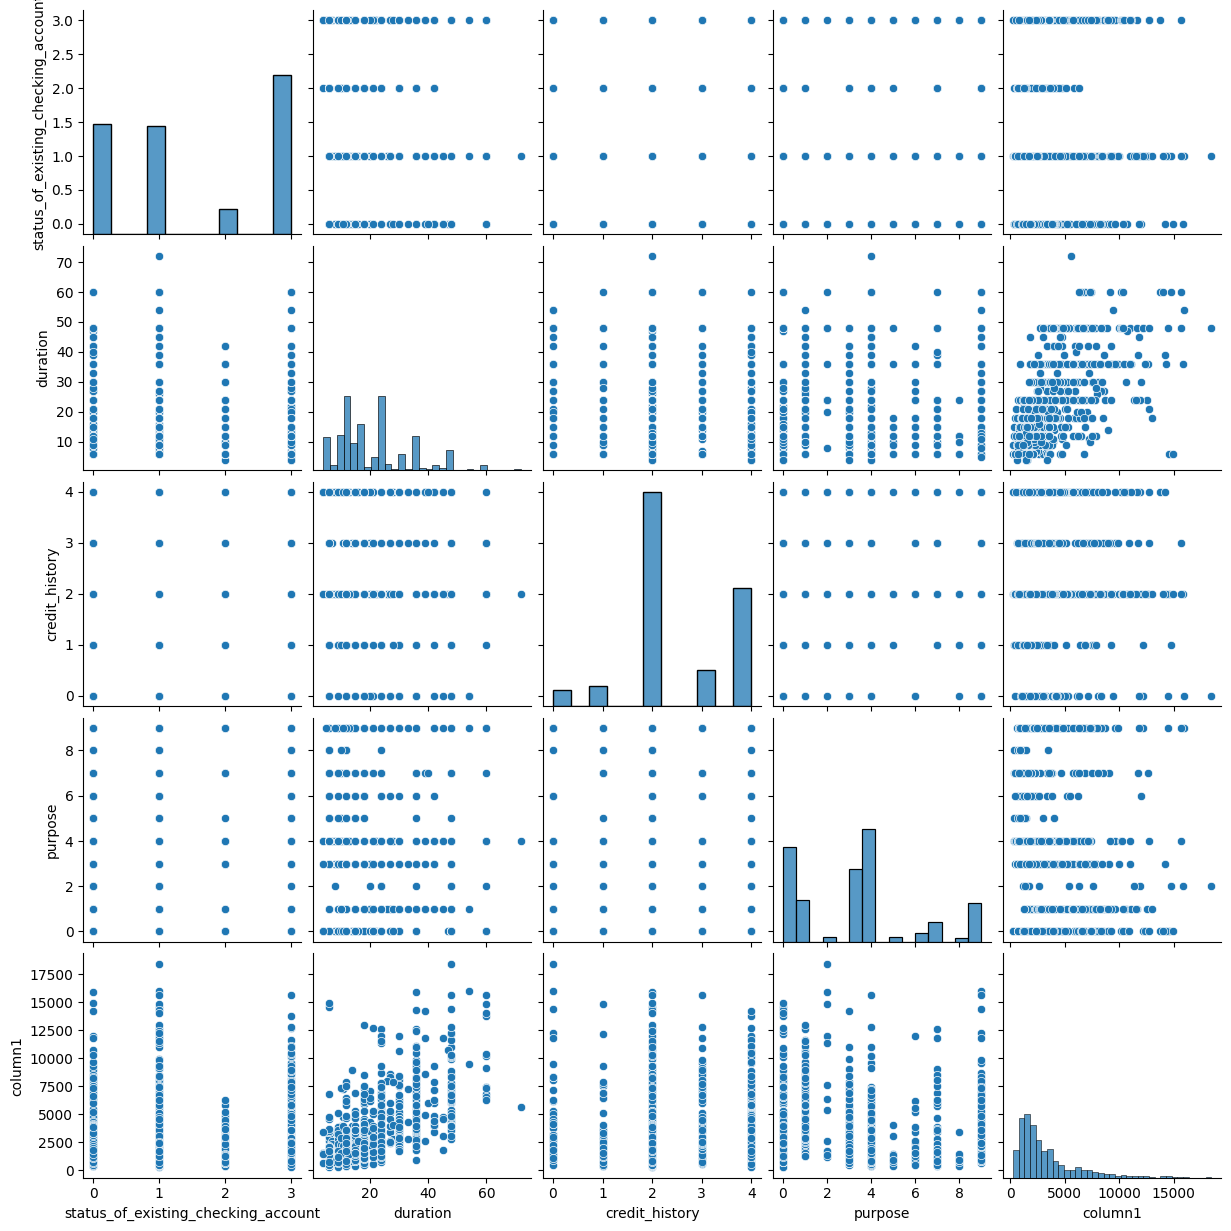

In [12]:
sns.pairplot(df[numeric_cols[:5]])
plt.show()


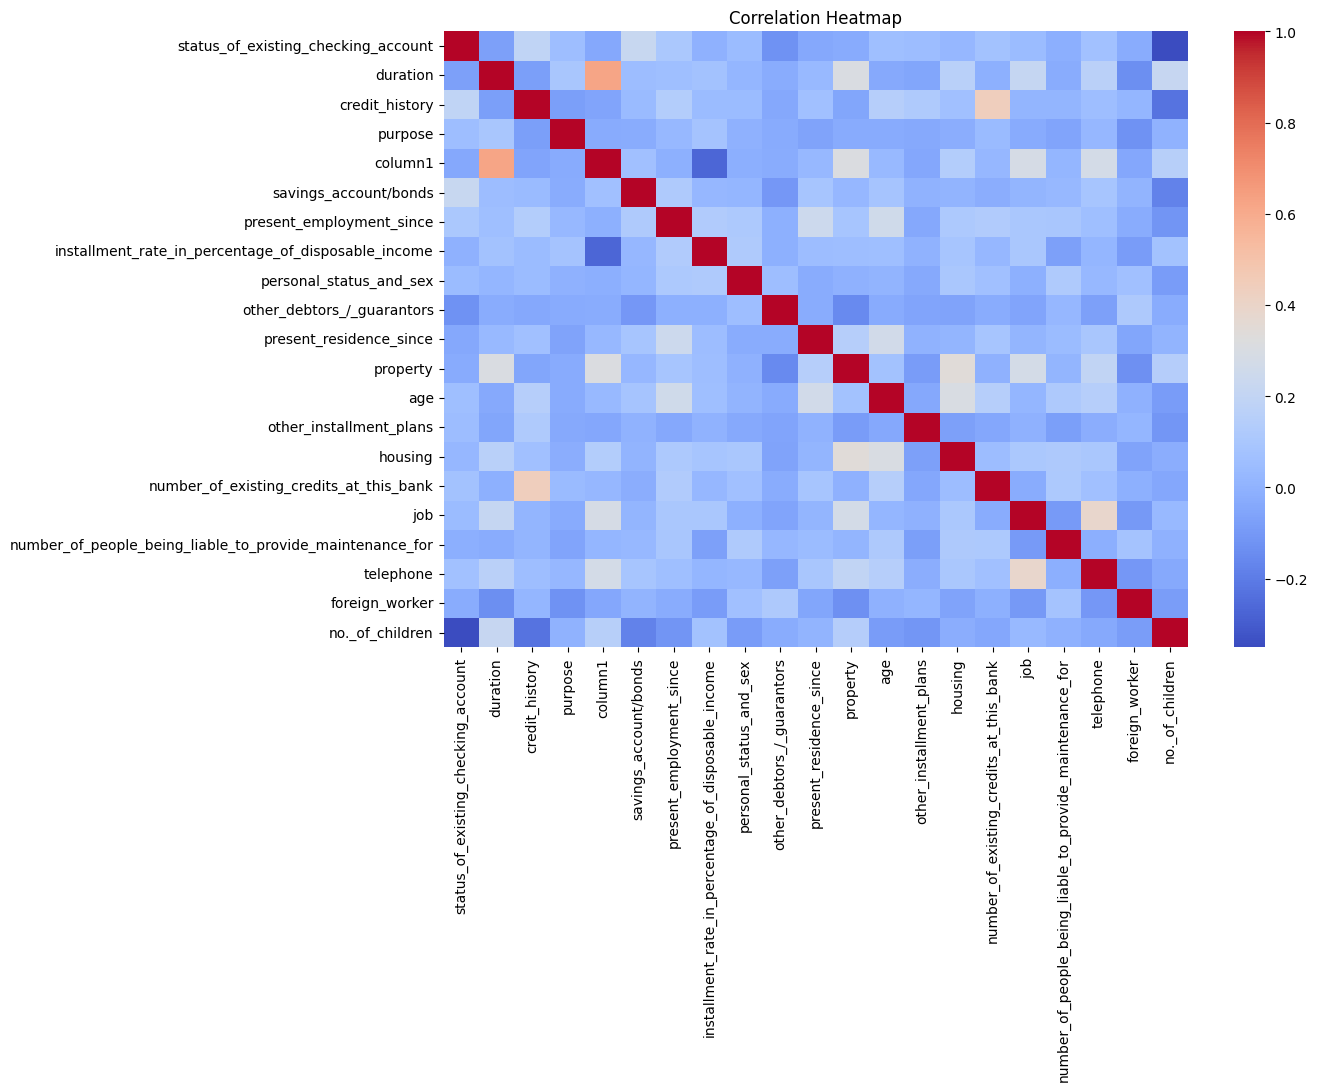

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


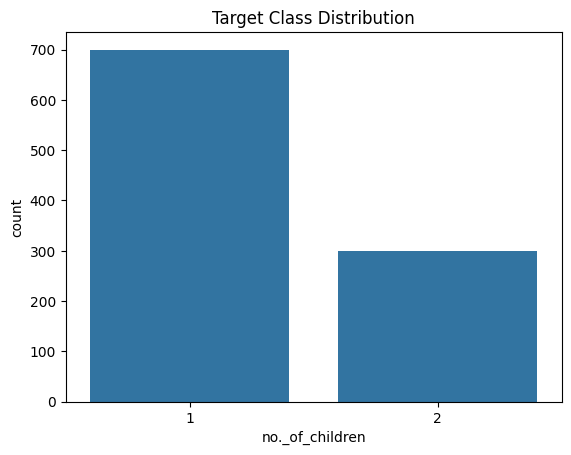

In [14]:
target_col = df.columns[-1]

sns.countplot(x=target_col, data=df)
plt.title("Target Class Distribution")
plt.show()


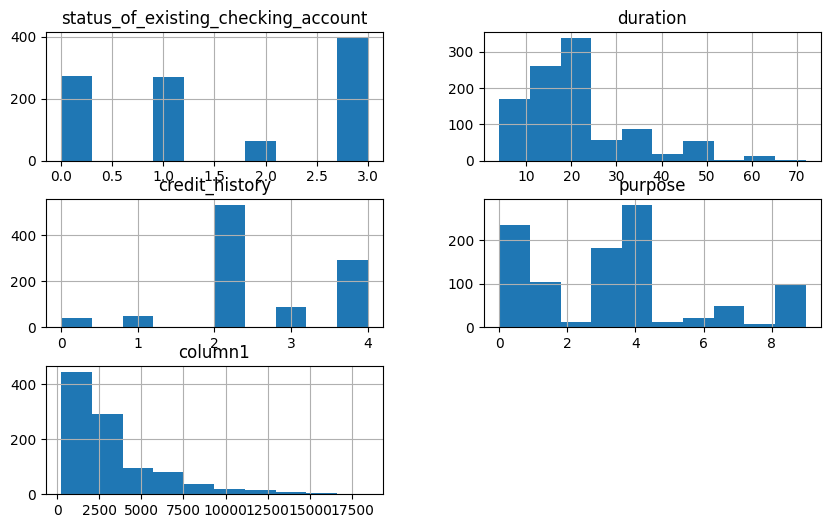

In [15]:
df[numeric_cols[:5]].hist(figsize=(10,6))
plt.show()
